matrix transformation only for perfect file (with path 0)

In [1]:
import os
import pandas as pd
import plotly.express as px
from positionism.optimizer import opti_amount_weirdos
from positionism.read import parameter
from positionism.preprocessing import create_dataframe
from positionism.plot import optimizer

In [2]:
direc = os.getcwd() # get current working directory

# # filefile_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_type2.cif"_path_ori_ref_48n24 = "./perfect_poscar/cif_matrix/ori/Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"  # Replace with your file path
  # Replace with your file path
# file_perfect_poscar_48n24_wo_cif = "Li6PS5Cl_type5_ver1_a"
file_perfect_poscar_48n24_wo_cif_array = ["Li6PS5Cl_type1"]
                                          # ["Li6PS5Cl_optitype1n2_strictr_a_type4_weirdo1_var2_opti_zoomedin"]
# file_perfect_poscar_48n24_wo_cif_array = ["Li6PS5Cl_type5_ver1_a_less_opti", "Li6PS5Cl_type5_ver1_b_less_opti", "Li6PS5Cl_type5_ver2_a_less_opti", "Li6PS5Cl_type5_ver2_b_less_opti", 
#                                           "Li6PS5Cl_type5_ver3_a_less_opti", "Li6PS5Cl_type5_ver3_b_less_opti", "Li6PS5Cl_type5_ver4_a_less_opti", "Li6PS5Cl_type5_ver4_b_less_opti", 
#                                           "Li6PS5Cl_type5_ver1_typ1_less_opti", "Li6PS5Cl_type5_ver1_typ2_less_opti", "Li6PS5Cl_type5_ver2_typ1_less_opti", "Li6PS5Cl_type5_ver2_typ2_less_opti",
#                                           "Li6PS5Cl_type5_ver3_typ1_less_opti", "Li6PS5Cl_type5_ver3_typ2_less_opti", "Li6PS5Cl_type5_ver4_typ1_less_opti", "Li6PS5Cl_type5_ver4_typ2_less_opti"]
# file_perfect_poscar_24_wo_cif = "Li6PS5Cl_type0"file_perfect_poscar_24_wo_cif

# "Li6PS5Cl_type5_ver1_a", "Li6PS5Cl_type5_ver1_b", "Li6PS5Cl_type5_ver2_a", "Li6PS5Cl_type5_ver2_b", 
#                                           "Li6PS5Cl_type5_ver3_a", "Li6PS5Cl_type5_ver3_b", "Li6PS5Cl_type5_ver4_a", "Li6PS5Cl_type5_ver4_b", 
#                                           "Li6PS5Cl_type5_ver1_typ1", "Li6PS5Cl_type5_ver1_typ2", "Li6PS5Cl_type5_ver2_typ1", "Li6PS5Cl_type5_ver2_typ2",
#                                           "Li6PS5Cl_type5_ver3_typ1", "Li6PS5Cl_type5_ver3_typ2", "Li6PS5Cl_type5_ver4_typ1", "Li6PS5Cl_type5_ver4_typ2",
                                          # "Li6PS5Cl_type5_ver1_a_less", "Li6PS5Cl_type5_ver1_b_less", "Li6PS5Cl_type5_ver2_a_less", "Li6PS5Cl_type5_ver2_b_less", 
                                          # "Li6PS5Cl_type5_ver3_a_less", "Li6PS5Cl_type5_ver3_b_less", "Li6PS5Cl_type5_ver4_a_less", "Li6PS5Cl_type5_ver4_b_less", 
                                          # "Li6PS5Cl_type5_ver1_typ1_less", "Li6PS5Cl_type5_ver1_typ2_less", "Li6PS5Cl_type5_ver2_typ1_less", "Li6PS5Cl_type5_ver2_typ2_less",
                                          # "Li6PS5Cl_type5_ver3_typ1_less", "Li6PS5Cl_type5_ver3_typ2_less", "Li6PS5Cl_type5_ver4_typ1_less", "Li6PS5Cl_type5_ver4_typ2_less"]

# file_ori_ref_48n24 = "Li6PS5Cl_48n24_mod_old_2p27291_0p88814_arcA.cif"

litype = 1
activate_radius = 1
max_mapping_radius = 0.075 # 0.025 # 0.043 # 0.035
max_mapping_radius_48htype2 = 0.075 # 0.075 # 0.076 # 0.071 

delta_radius = 0.001 
n_sample = 114

# select the starting and ending group index of files (ascending based on energy)
n_file_start = 0
n_file_end = 54

In [3]:
reference_folder = "_reference_cif"
results_folder = "_results"
iter_type = "varying_radius"

max_mapping_radius_init = max_mapping_radius
max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

folder_name_iter_type = f"/{results_folder}/_{iter_type}/"
path_folder_name_iter_type = direc+str(folder_name_iter_type)

In [4]:
file_name_toten = "toten_final.ods"
col_excel_geo = "geometry"
col_excel_path = "path"
dtype = {col_excel_geo: float, col_excel_path: float}
data_toten = pd.read_excel(file_name_toten, dtype=dtype, engine="odf")
df_metainfo = create_dataframe.base(data_toten, file_name="CONTCAR")
df_selectedidx = df_metainfo[['geometry','path','subdir_new_system', 'toten [eV]']].sort_values("toten [eV]", ascending=True)[n_file_start:n_file_end].reset_index().copy()

/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/create_dataframe.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_file["g+p+1"][0] = 0 # replace 1st element with 0
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/create_dataframe.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_file["g+p-1"][(df_file["g+p-1"]).size - 1] = 0.0 # replace last element with 0
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/create_dataframe.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [5]:
foldermapping_namestyle_all = False
modif_all_litype = False
cif_namestyle_all = False
full_calculation = False

In [6]:
for file_perfect_poscar_48n24_wo_cif in file_perfect_poscar_48n24_wo_cif_array:
    file_perfect_poscar_48n24 = f"{file_perfect_poscar_48n24_wo_cif}.cif"
    file_path_ori_ref_48n24 = f"./{reference_folder}/{file_perfect_poscar_48n24}"
    ref_positions_array = parameter.x_y_z(file_path_ori_ref_48n24, litype)

    col_radius_type1 = "radius_type1"
    col_radius_type2 = "radius_type2"
    col_sumweirdosLi = "sumweirdosLi"

    radius_sumweirdosLi_df = pd.DataFrame()
    radius_sumweirdosLi_df[col_radius_type1] = None
    radius_sumweirdosLi_df[col_radius_type2] = None
    radius_sumweirdosLi_df[col_sumweirdosLi] = None

    idx_sumweirdosLi_df = 0
    # forward_max_mapping_radius_init = max_mapping_radius
    # forward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2
    backward_max_mapping_radius_init = max_mapping_radius
    backward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

    # for i in range(int(n_sample/2)):
    #     forward_max_mapping_radius = forward_max_mapping_radius_init + (i * delta_radius)
    #     # forward_max_mapping_radius_48htype2 = forward_max_mapping_radius_init + (i * delta_radius)
    #     forward_max_mapping_radius_48htype2 = forward_max_mapping_radius_48htype2_init

    #     # sum_weirdos_Li = get_sum_weirdos_Li_w_radius(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, forward_max_mapping_radius, forward_max_mapping_radius_48htype2, var_optitype)
    #     sum_weirdos_Li = get_sum_weirdos_Li_var(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, forward_max_mapping_radius, forward_max_mapping_radius_48htype2, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)

    #     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type1] = forward_max_mapping_radius
    #     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type2] = forward_max_mapping_radius_48htype2
    #     radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li
        
    #     idx_sumweirdosLi_df += 1
    #     print(idx_sumweirdosLi_df)

    for j in range(int(n_sample/2)):
        backward_max_mapping_radius = backward_max_mapping_radius_init - (j * delta_radius)
        backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init - (j * delta_radius)
        # backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init
        # backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init

        # sum_weirdos_Li = get_sum_weirdos_Li_w_radius(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, var_optitype)
        # sum_weirdos_Li = get_sum_weirdos_Li_var(dx1_48h_type1, dx2_48h_type1, dz_48h_type1, dx1_48h_type2, dx2_48h_type2, dz_48h_type2, dx_24g, dz1_24g, dz2_24g, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, activate_radius, file_perfect_poscar_24, file_perfect_poscar_48n24, litype, var_optitype)
        # sum_weirdos_Li = opti_amount_weirdos.get_sum_weirdos_Li_var(backward_max_mapping_radius, backward_max_mapping_radius_48htype2, activate_radius, 
        #                                         file_perfect_poscar_24_wo_cif, file_perfect_poscar_48n24_wo_cif, 
        #                                         litype, var_optitype, iter_type = "varying_radius", foldermapping_namestyle_all = True, 
        #                                         cif_namestyle_all = None, modif_all_litype = None, full_calculation=True)
        # sum_weirdos_Li = opti_amount_weirdos.get_sum_weirdos_Li(ref_positions_array, max_mapping_radius, max_mapping_radius_48htype2, 
        #                                         dataframe_init, activate_radius, file_ori_ref_48n24_wo_cif, litype, iter_type)
        # # sum_weirdos_Li = get_sum_weirdos_Li_var_not_complete(max_mapping_radius, max_mapping_radius_48htype2, activate_radius, 
        # #                                         file_perfect_poscar_24_wo_cif, file_perfect_poscar_48n24_wo_cif, 
        # #                                         litype, var_optitype, iter_type, foldermapping_namestyle_all, 
        # #                                         cif_namestyle_all, modif_all_litype, full_calculation)
        # # sum_weirdos_Li = get_sum_weirdos_Li_var_litype(ref_positions_array, max_mapping_radius, max_mapping_radius_48htype2, 
        # #                                         activate_radius, file_perfect_poscar_24, file_ori_ref_48n24, litype, var_optitype)
        
        sum_weirdos_Li = opti_amount_weirdos.get_sum_weirdos_Li(ref_positions_array, backward_max_mapping_radius, backward_max_mapping_radius_48htype2, 
                       df_selectedidx, activate_radius, file_perfect_poscar_48n24_wo_cif, litype, iter_type, 
                       foldermapping_namestyle_all, modif_all_litype, cif_namestyle_all, full_calculation)
        
        radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type1] = backward_max_mapping_radius
        radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_radius_type2] = backward_max_mapping_radius_48htype2
        radius_sumweirdosLi_df.at[idx_sumweirdosLi_df, col_sumweirdosLi] = sum_weirdos_Li

        idx_sumweirdosLi_df += 1
        print(idx_sumweirdosLi_df)

    min_sumweirdos = int(radius_sumweirdosLi_df["sumweirdosLi"].min())
    radius_sumweirdosLi_df.to_excel(f'{path_folder_name_iter_type}07_varying_radius_{min_sumweirdos}_{file_perfect_poscar_48n24_wo_cif}.xlsx', index=False)


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

1


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

2


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

3


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

4


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

5


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

6


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

7


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

8


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

9


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

10


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

11


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

12


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

13


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

14


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

15


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

16


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

17


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

18


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

19


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

20


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

21


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

22


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

23


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

24


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

25


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

26


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

27


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

28


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

29


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

30


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

31


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

32


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

33


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

34


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

35


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

36


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

37


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

38


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

39


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

40


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

41


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

42


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

43


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

44


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

45


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

46


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

47


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

48


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

49


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

50


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

51


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

52


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

53


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

54


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

55


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

56


/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_subdir_positive_file][idx] = destination_path
/home/azka/Documents/01_Masterthesis/Atomic-Positionism/positionism/preprocessing/CONTCARorPOSCAR.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

57


In [7]:
el = "Li"

for file_perfect_poscar_48n24_wo_cif in file_perfect_poscar_48n24_wo_cif_array:
    file_perfect_poscar_48n24 = f"{file_perfect_poscar_48n24_wo_cif}.cif"

    col_radius_type1 = "radius_type1"
    col_radius_type2 = "radius_type2"
    col_amount_empty = "amount_empty"

    radius_amount_empty_df = pd.DataFrame()
    radius_amount_empty_df[col_radius_type1] = [0 for _ in range(int(n_sample/2))]
    radius_amount_empty_df[col_radius_type2] = [0 for _ in range(int(n_sample/2))]
    radius_amount_empty_df[col_amount_empty] = [0 for _ in range(int(n_sample/2))]

    idx_amount_empty_df = 0
    # forward_max_mapping_radius_init = max_mapping_radius
    # forward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2
    backward_max_mapping_radius_init = max_mapping_radius
    backward_max_mapping_radius_48htype2_init = max_mapping_radius_48htype2

    for j in range(int(n_sample/2)):
        df = pd.DataFrame()

        backward_max_mapping_radius = backward_max_mapping_radius_init - (j * delta_radius)
        backward_max_mapping_radius_48htype2 = backward_max_mapping_radius_48htype2_init - (j * delta_radius)

        if activate_radius == 1:
            file_loc_important_cols = pd.read_pickle(f'{path_folder_name_iter_type}{file_perfect_poscar_48n24_wo_cif}/dataframe_{backward_max_mapping_radius}_{file_perfect_poscar_48n24_wo_cif}.pkl') 
        elif activate_radius == 2:
            file_loc_important_cols = pd.read_pickle(f'{path_folder_name_iter_type}{file_perfect_poscar_48n24_wo_cif}/dataframe_{backward_max_mapping_radius}_{backward_max_mapping_radius_48htype2}_{file_perfect_poscar_48n24_wo_cif}.pkl')
        # elif activate_radius == 3:
        #     file_loc_important_cols = pd.read_pickle(f'{path_folder_name_iter_type}dataframe{max_mapping_radius}_{max_mapping_radius_48htype2}_{max_mapping_radius_48htype1_48htype2}_{file_perfect_poscar_48n24_wo_cif}.pkl')

        col_top1_sorted_idxweirdo_label_el = f"top1_sorted_idxweirdo_label_{el}"

        data = file_loc_important_cols[col_top1_sorted_idxweirdo_label_el]

        df = pd.DataFrame(data.items(), columns=['index', 'idxweirdo_label'])

        # Count empty dictionaries
        amount_empty = df['idxweirdo_label'].apply(lambda x: len(x) == 0).sum()

        radius_amount_empty_df.at[j, col_radius_type1] = backward_max_mapping_radius
        radius_amount_empty_df.at[j, col_radius_type2] = backward_max_mapping_radius_48htype2
        radius_amount_empty_df.at[j, col_amount_empty] = amount_empty

In [8]:
radius_amount_empty_df

,radius_type1,radius_type2,amount_empty
0,0.075,0.075,40
1,0.074,0.074,40
2,0.073,0.073,40
3,0.072,0.072,39
4,0.071,0.071,37
5,0.070,0.070,37
6,0.069,0.069,37
7,0.068,0.068,37
8,0.067,0.067,37
9,0.066,0.066,37


In [9]:
fig = px.bar(radius_amount_empty_df, x="radius_type1", y="amount_empty", title="Amount of folder w/o weirdo")
fig.show()

In [10]:
radius_sumweirdosLi_df

,radius_type1,radius_type2,sumweirdosLi
0,0.075,0.075,25.0
1,0.074,0.074,25.0
2,0.073,0.073,26.0
3,0.072,0.072,27.0
4,0.071,0.071,29.0
5,0.07,0.07,29.0
6,0.069,0.069,29.0
7,0.068,0.068,29.0
8,0.067,0.067,29.0
9,0.066,0.066,29.0


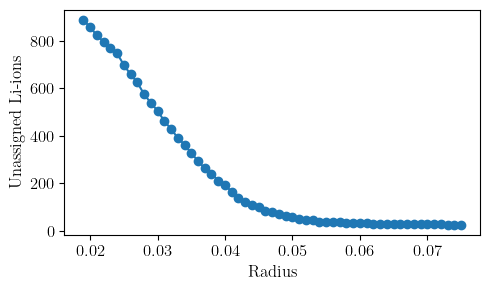

In [24]:
folder_results_iter_type = f"/{results_folder}/_{iter_type}/{file_perfect_poscar_48n24_wo_cif}/"
optimizer.radius_plot(radius_sumweirdosLi_df, folder_results_iter_type, litype)

In [25]:
min_empty_df = int(radius_amount_empty_df["amount_empty"].min())
radius_amount_empty_df.to_excel(f'.{folder_results_iter_type}07_varying_radius_empty_df_{min_empty_df}_{file_perfect_poscar_48n24_wo_cif}.xlsx', index=False)


In [ ]:
optimizer.plot_bar_with_latex_font(radius_amount_empty_df, folder_results_iter_type, litype)

In [12]:
# min_sumweirdos = int(radius_sumweirdosLi_df["sumweirdosLi"].min())

In [13]:
# path_folder_name_iter_type

In [14]:
# radius_sumweirdosLi_df.to_excel(f'{path_folder_name_iter_type}07_varying_radius_{min_sumweirdos}_{file_perfect_poscar_48n24_wo_cif}_{var_excel_file}.xlsx', index=False)

In [15]:
# radius_sumweirdosLi_df(radius_sumweirdosLi_df)